In [151]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import sklearn
import sys
import tensorflow as tf
import time
from PIL import Image

from tensorflow import keras
from tensorflow.keras.preprocessing import image
print(tf.__version__)

2.1.0


## tf.nn.conv2d

In [299]:
img = image.load_img("D:/image/yx.jpg")
r, g, b = img.split()
im = image.img_to_array(b)
im

array([[[  9.],
        [  7.],
        [  9.],
        ...,
        [ 36.],
        [ 50.],
        [ 57.]],

       [[  8.],
        [  6.],
        [  8.],
        ...,
        [ 53.],
        [ 65.],
        [ 57.]],

       [[ 18.],
        [ 14.],
        [ 15.],
        ...,
        [ 59.],
        [ 64.],
        [ 58.]],

       ...,

       [[105.],
        [ 89.],
        [195.],
        ...,
        [207.],
        [132.],
        [ 99.]],

       [[ 88.],
        [123.],
        [204.],
        ...,
        [213.],
        [201.],
        [115.]],

       [[187.],
        [185.],
        [204.],
        ...,
        [208.],
        [203.],
        [213.]]], dtype=float32)

In [300]:
input   = tf.constant([im],shape=[1,100,100,1])

In [301]:
kernel = tf.constant([
        [
            [1.0],  [2.0], [1.0],
            [0.0],  [0.0], [0.0],
            [-1.0], [-2.0],[-1.0]

        ]
    ],shape=[3,3,1,1])
conv2d = tf.nn.conv2d(input, kernel, strides=[1, 1, 1, 1], padding='SAME')

In [302]:
np1 = conv2d.numpy()
np1

array([[[[ -22.],
         [ -28.],
         [ -31.],
         ...,
         [-210.],
         [-240.],
         [-179.]],

        [[ -25.],
         [ -29.],
         [ -25.],
         ...,
         [ -79.],
         [ -52.],
         [ -16.]],

        [[ -21.],
         [ -21.],
         [ -15.],
         ...,
         [ -57.],
         [ -22.],
         [  -8.]],

        ...,

        [[  28.],
         [  25.],
         [  70.],
         ...,
         [ -62.],
         [ -89.],
         [ -78.]],

        [[-260.],
         [-283.],
         [-202.],
         ...,
         [-162.],
         [-257.],
         [-299.]],

        [[ 299.],
         [ 538.],
         [ 627.],
         ...,
         [ 813.],
         [ 730.],
         [ 431.]]]], dtype=float32)

In [129]:
np2 = np1[0,:,:,0]
np2.shape

(100, 100)

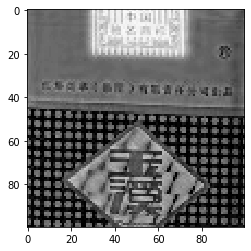

In [130]:
plt.imshow(r, cmap='Greys')

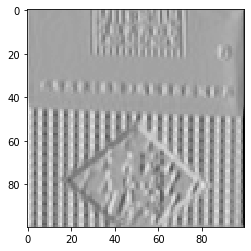

In [131]:
plt.imshow(np2, cmap='Greys')

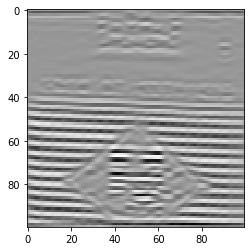

In [40]:
conv2d1 = tf.nn.conv2d(conv2d, kernel, strides=[1, 1, 1, 1], padding='SAME')
conv2d2 = tf.nn.conv2d(conv2d1, kernel, strides=[1, 1, 1, 1], padding='SAME')
conv2d3 = tf.nn.conv2d(conv2d2, kernel, strides=[1, 1, 1, 1], padding='SAME')
l4 = conv2d3.numpy()[0,:,:,0]
plt.imshow(l4, cmap='Greys')

## tf.keras.layers.Conv2D

In [170]:
img = image.load_img("D:/image/yx.jpg")
im = image.img_to_array(img)
im = np.expand_dims(im, axis=0)
im.shape

(1, 100, 100, 3)

In [171]:
conv = tf.keras.layers.Conv2D(filters=3,kernel_size=3,strides=(1,1),padding='same')
output = conv(im)

In [121]:
output

(array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([ 0,  0,  0, ..., 99, 99, 99], dtype=int64),
 array([ 0,  0,  0, ..., 99, 99, 99], dtype=int64),
 array([0, 1, 2, ..., 0, 1, 2], dtype=int64))

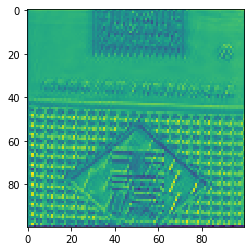

In [119]:
plt.imshow(output[0,:,:,0])

tf.nn.conv2d

In [42]:
sample   = tf.constant([
        [  
            [[1.0], [2.0], [3.0]],
            [[4.0], [5.0], [6.0]],
            [[7.0], [8.0], [9.0]]
        ]
    ],shape=[1,3,3,1])
value = tf.nn.conv2d(sample, kernel, strides=[1, 1, 1, 1], padding='SAME')
value.numpy()[0,:,:,0]

array([[-13., -20., -17.],
       [-18., -24., -18.],
       [ 13.,  20.,  17.]], dtype=float32)

In [132]:
sample   = tf.constant([
        [  
            [[1.0], [2.0], [3.0]],
            [[4.0], [5.0], [6.0]],
            [[7.0], [8.0], [9.0]]
        ],
    [  
            [[1.0], [2.0], [3.0]],
            [[4.0], [5.0], [6.0]],
            [[7.0], [8.0], [9.0]]
        ],
    [  
            [[1.0], [2.0], [3.0]],
            [[4.0], [5.0], [6.0]],
            [[7.0], [8.0], [9.0]]
        ]
    ],shape=[1,3,3,3])
value = tf.nn.conv2d(sample, kernel, strides=[1, 1, 1, 1], padding='SAME')
value.numpy()[0,:,:,0]

array([[-40., -48.,  40.],
       [-60., -72.,  60.],
       [-40., -48.,  40.]], dtype=float32)

In [141]:
kernel.numpy().shape

(3, 3, 3, 1)

In [139]:
k = tf.constant([
        [
            [1.0],  [2.0], [1.0],
            [0.0],  [0.0], [0.0],
            [-1.0], [-2.0],[-1.0]

        ],
    [
            [1.0],  [2.0], [1.0],
            [0.0],  [0.0], [0.0],
            [-1.0], [-2.0],[-1.0]

        ],
    [
            [1.0],  [2.0], [1.0],
            [0.0],  [0.0], [0.0],
            [-1.0], [-2.0],[-1.0]

        ]
    ],shape=[3,3,3])
k1 = tf.expand_dims(k, axis=3)
k1.numpy().shape

(3, 3, 3, 1)

## tf.keras.layers.Conv2D

### 非定义权重

In [70]:
sample   = tf.constant([
        [  
            [[1.0], [2.0], [3.0]],
            [[4.0], [5.0], [6.0]],
            [[7.0], [8.0], [9.0]]
        ]
    ],shape=[1,3,3,1])
value = tf.keras.layers.Conv2D(filters=1,kernel_size=3,strides=(1,1),padding='same')(sample)
value.numpy()

array([[[[ 0.9140318 ],
         [ 1.0805904 ],
         [-0.98877215]],

        [[ 0.39754844],
         [ 0.6345083 ],
         [-1.8166602 ]],

        [[-1.1482286 ],
         [-1.0278435 ],
         [-3.404425  ]]]], dtype=float32)

###  自定义权重

In [203]:
from keras import backend as K
def kernel_init(shape, dtype=None):
    b = K.constant([[1.0],  [2.0], [1.0],
            [0.0],  [0.0], [0.0],
            [-1.0], [-2.0],[-1.0]],shape=[3,3,1,1])
    return b

In [204]:
sample   = tf.constant([
        [  
            [[1.0], [2.0], [3.0]],
            [[4.0], [5.0], [6.0]],
            [[7.0], [8.0], [9.0]]
        ]
    ],shape=[1,3,3,1])
value = tf.keras.layers.Conv2D(filters=1,kernel_size=3,strides=(1,1),padding='same',kernel_initializer=kernel_init)(sample)
value.numpy()

array([[[[-13.],
         [-20.],
         [-17.]],

        [[-18.],
         [-24.],
         [-18.]],

        [[ 13.],
         [ 20.],
         [ 17.]]]], dtype=float32)

### 卷积后计算

In [303]:
img = image.load_img("D:/image/yx.jpg") #yx0为加工过的图片，3个通道值相同
r, g, b = img.split()
im = image.img_to_array(img)
im

array([[[164.,  15.,   9.],
        [165.,  12.,   7.],
        [169.,   9.,   9.],
        ...,
        [175.,  28.,  36.],
        [188.,  43.,  50.],
        [195.,  50.,  57.]],

       [[163.,  14.,   8.],
        [163.,  11.,   6.],
        [168.,   8.,   8.],
        ...,
        [191.,  46.,  53.],
        [200.,  56.,  65.],
        [194.,  51.,  57.]],

       [[170.,  22.,  18.],
        [169.,  17.,  14.],
        [172.,  14.,  15.],
        ...,
        [192.,  51.,  59.],
        [195.,  55.,  64.],
        [190.,  51.,  58.]],

       ...,

       [[173., 113., 105.],
        [155.,  98.,  89.],
        [255., 203., 195.],
        ...,
        [254., 216., 207.],
        [186., 144., 132.],
        [156., 112.,  99.]],

       [[157.,  99.,  88.],
        [187., 133., 123.],
        [255., 213., 204.],
        ...,
        [247., 223., 213.],
        [240., 212., 201.],
        [156., 126., 115.]],

       [[255., 198., 187.],
        [251., 197., 185.],
        [255., 2

In [304]:
im = np.expand_dims(im, axis=0)

In [305]:
from keras import backend as K

def kernel_init(shape, dtype=None):
    b = K.constant([[[ 1.,  1.,  1.],
        [ 2.,  2.,  2.],
        [ 1.,  1.,  1.]],

       [[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]],

       [[-1., -1., -1.],
        [-2., -2., -2.],
        [-1., -1., -1.]]],shape=[3,3,3,1])
    return b

In [306]:
conv = tf.keras.layers.Conv2D(filters=1,kernel_size=3,strides=(1,1),padding='same',kernel_initializer=kernel_init)
output = conv(im)

In [307]:
output.numpy()[0,:,:,0]

array([[ -550.,  -729.,  -737., ..., -1149., -1234.,  -925.],
       [  -60.,   -68.,   -57., ...,  -210.,  -126.,   -27.],
       [  -48.,   -42.,   -22., ...,  -121.,   -19.,    15.],
       ...,
       [   82.,    82.,   222., ...,  -147.,  -223.,  -195.],
       [ -789.,  -850.,  -592., ...,  -403.,  -671.,  -817.],
       [ 1131.,  1902.,  2153., ...,  2618.,  2386.,  1447.]],
      dtype=float32)

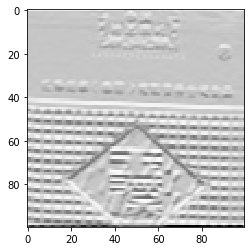

In [308]:
plt.imshow(output.numpy()[0,:,:,0], cmap='Greys')